In [6]:
rho = 1.22;
g = -9.8;

In [ ]:
set(gcf,'Visible','on')

In [2]:
A = 0.0032;
L = 0.77;
Cp = 0.45;
Cg = 0.36;
Cn_alpha = 5.5;
Cd = 0.623;
m = 0.408;

In [3]:
function [thrust, mmass] = f39thrust(t)
    if t < 0
        thrust = 0;
        mmass = 59;
    elseif t>=0 & t<0.05
        thrust = 1200*t;
        mmass = 20 + 39*(1-t/1.3);
    elseif t>=0.05 & t<=1
        thrust = 62-34*t;
        mmass = 20 +39*(1-t/1.3);
    elseif t>1 & t<1.3
        thrust = 106.71386*(t-1.63844)^2-11.9435;
        mmass = 20 + 39*(1-t/1.3);
    else
        thrust = 0;
        mmass = 20;
    end
    mmass = mmass/1000;
endfunction

In [4]:
theta = 2;
phi = 45;
mini_rod_length = 0.3;

dir = [sind(theta)*cosd(phi); sind(theta)*sind(phi); cosd(theta)];

pos = [0; 0; mini_rod_length];
vel = [0; 0; 0];
accel = [0; 0; 0];

t = 0;
dt = 0.01;

positions = [t; pos];


while pos(3,1) >= 0
  grav_force = [0;0;m*g];
  drag_force = 0.5*Cd*A*rho* norm(vel) * -vel;
  
  [currthrust, motormass] = f39thrust(t);
  thrust_force = currthrust * dir/norm(dir);

  total_accel = (grav_force + drag_force + thrust_force)/(m+motormass);

  accel = total_accel;
  vel = vel + accel * dt;
  pos = pos + vel*dt + 0.5*accel*dt^2;
  t = t+dt;

  positions = [positions [t; pos]];
end

apogee_m = 263.66
apogee_ft = 865.06


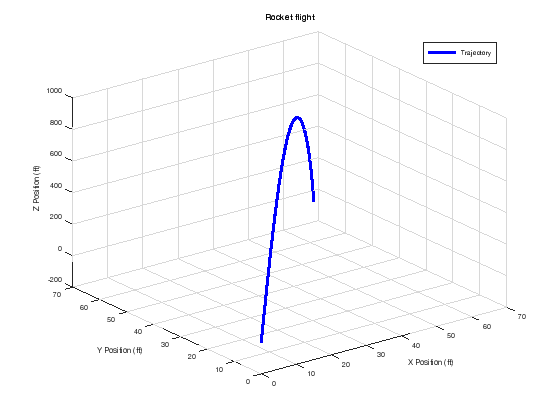

In [8]:
apogee_m = max(positions(4,:))
apogee_ft = apogee_m * 3.281

figure;
plot3(positions(2,:)*3.281, positions(3,:)*3.281, positions(4,:)*3.281, 'b', 'LineWidth', 2);
hold on;
grid on;
xlabel('X Position (ft)');
ylabel('Y Position (ft)');
zlabel('Z Position (ft)');
title('Rocket flight');
legend('Trajectory');
view;
set(gcf,'Visible','on')